<font face="B Mitra" size=4>
<div dir=rtl align=center>

<br>
<img src="https://aut.ac.ir/templates/tmpl_modern01/images/logo_fa.png" alt="Amirkabir University Logo" width="100">

<br>
<font size=2>
<b>دانشگاه صنعتی امیرکبیر - دانشکده ریاضی و علوم کامپیوتر</b>
</font>

<br>
<font size=6>
<b>مقدمه‌ای بر پردازش تصویر</b>
</font>

<br>
<hr/>
<font size=6>
<b>کارگاه دوم: تبدیلات تصویر و مقدمات هیستوگرام در OpenCV</b>
</font>

<br>
استاد: دکتر مصطفی شمسی



<hr>
</div>
</font>


<font face="B Mitra">
<div dir=rtl>

<font size=5>
<b>بارگذاری کتابخانه‌ها و توابع کمکی مورد نیاز</b>
</font>

</div>
</font>

In [93]:
import cv2
import math
import requests # For reading image from URL
import numpy as np
import matplotlib.pylab as plt
from google.colab.patches import cv2_imshow # For displaying image in Google Colab

def read_image_from_url(url):
    # Fetch the content from the url
    response = requests.get(url)
    # Check if the request was successful
    response.raise_for_status()
    # Convert the response content to a numpy array and then to a OpenCV BGR image
    image = cv2.imdecode(np.asarray(bytearray(response.content), dtype="uint8"), cv2.IMREAD_COLOR)
    return image

<hr>
<font face="B Mitra" size=5>
<div dir=rtl>

<p>توجه داشته باشید که در مورد نمایش تصاویر، اگر از colab استفاده می‌کنید از تابع cv2_imshow استفاده کرده و در ژوپیتر نوتبوک از matplotlib استفاده کنید و به تبدیل BGR به RGB دقت کنید.</p>

</div>
</font>

<hr>
<font face="B Mitra" size=5>
<div dir=rtl>

<font size=5>
<b>سوالات تئوری</b>
</font>

<p>در این بخش تئوری درس را مرور می‌کنیم. جواب سوالات مشخص شده را می‌توانید در یک سلول جدا بنویسید</p>

<p>
<b>سوال ۱.</b>
فرض کنید در حال تهیه گزارشی هستید که باید در تصویری به سایز ۲۰۴۸ در ۲۰۴۸ پیکسل قرار بگیرد.
<ul>
الف) با فرض عدم محدودیت در پرینتر، وضوح تصویر (بر حسب خط در هر میلی‌متر) چقدر باید باشد تا تصویر در فضایی به اندازه ۵ در ۵ سانتی‌متر قرار بگیرد؟
</ul>
<ul>
ب) وضوح تصویر بر حسب dpi باید چقدر باشد تا تصویر در ۲ در ۲ اینچ قرار بگیرد؟
</ul>

</p>

<p>
</p>




</div>
</font>

سوال یک بخش الف

(2048/50)/2 = 20.48

سوال یک بخش ب

1DPI = 1 PPI
DPI = (2048/2+2048/2)*1/2 = 1024

<hr>

<font face="B Mitra" size=5>
<div dir=rtl>

<font size=5>
<b>۱. تبدیل تصاویر </b>
</font>

<font size=5>
<b>تصاویر باینری، تک‌رنگ(Monochrome)، خاکستری(Grayscale)</b>
</font>

<br>

<p>تصاویر دیجیتال علاوه بر تصاویر رنگی به دسته‌های زیر تقسیم می‌شوند:</p>

<ol>
  <li>تصاویر باینری (Binary)</li>
  <li>تصاویر تک‌رنگ (Monochrome)</li>
  <li>تصاویر خاکستری (Grayscale)</li>
</ol>

<p align="justify">
<font size=4>
<b>۱.۱ تبدیل به خاکستری</b>


تبدیل به تصویر خاکستری، فرآیندی است که تصویر رنگی را به یک کانال تکی کاهش می‌دهد که نماینده شدت هر پیکسل است. این کار تصویر را برای وظایف مختلف پردازش تصویر ساده می‌کند.
</font>

</p>


</div>
</font>

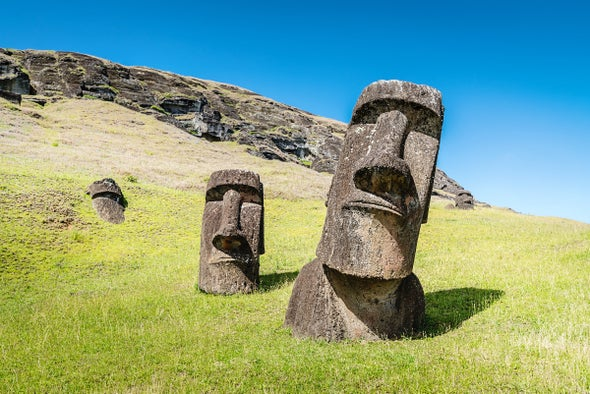

In [94]:
image = read_image_from_url("https://static.scientificamerican.com/sciam/cache/file/DB4E849F-5267-4A4C-A8A1F8AB1344C945_source.jpg?w=590&h=800&8397FFEE-1F26-49BC-98ECB53FE3F8A6D6")
cv2_imshow(image)

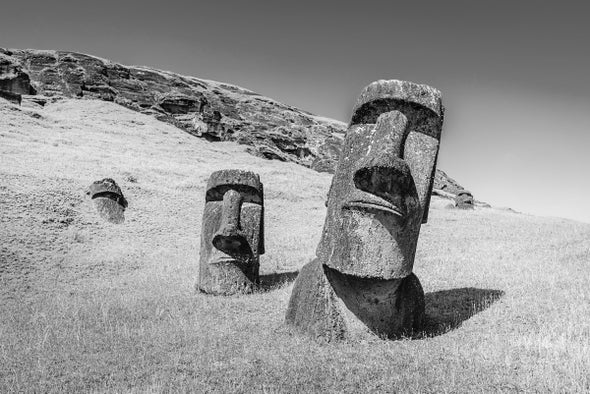

In [95]:
image = read_image_from_url("https://static.scientificamerican.com/sciam/cache/file/DB4E849F-5267-4A4C-A8A1F8AB1344C945_source.jpg?w=590&h=800&8397FFEE-1F26-49BC-98ECB53FE3F8A6D6")
grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(grayscale_image)

<font face="B Mitra" size=5>
<div dir=rtl>

</font>

<p align="justify">
<font size=4>
<b>۱.۲ تبدیل به باینری </b>

تبدیل به تصویر باینری شامل تبدیل تصویر به یک فرمت سیاه و سفید است، به طوری که هر پیکسل به صورت کاملاً سیاه یا کاملاً سفید باشد. این معمولاً با استفاده از  Thresholding به دست می‌آید.

</p>


</div>
</font>

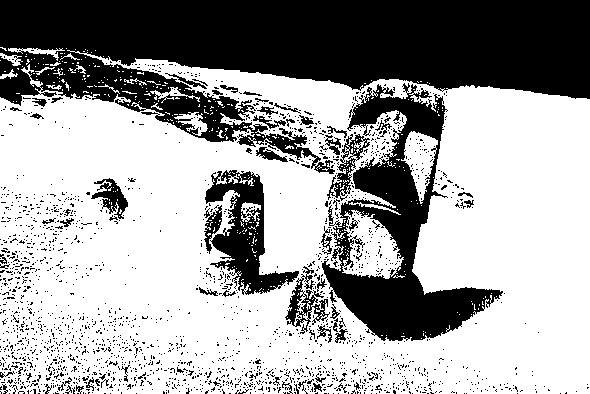

In [96]:
image = read_image_from_url("https://static.scientificamerican.com/sciam/cache/file/DB4E849F-5267-4A4C-A8A1F8AB1344C945_source.jpg?w=590&h=800&8397FFEE-1F26-49BC-98ECB53FE3F8A6D6")
grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

threshold_value = 128
max_value = 255
ret, binary_image = cv2.threshold(grayscale_image, threshold_value, max_value, cv2.THRESH_BINARY)

cv2_imshow(binary_image)

<font face="B Mitra" size=5>
<div dir=rtl>

<font size=5>
<b>تمرین ۱:</b>
</font>

<br>
<p>
<font size=4>
حال که با مفهوم عکس‌های باینری، خاکستری، رنگی و تبدیلات آن ها آشنا شدید تصویر قرار داده شده در لینک را در نظر بگیرید:: </font>
<ol>
  <li> تصویر مورد نظر را به تصویر باینری تبدیل کنید.</li>
  <li>تصویر مورد نظر را به تصویر خاکستری تبدیل کنید.</li>
  <li>همان طور که قبلا گفته شد باینری برای تقسیم بندی پیکسل‌ها به دو دسته صورت می‌گیرد. فرض کنید که تعداد دسته‌ها در قالب پارامتر k به شما داده می‌شود.
  شما باید بازه‌ی 0 تا 255 را به k بازه تقسیم کنید و از هر باز عدد اولیه را به عنوان نماینده بازه در نظر بگیرید: در حالت k=2 جواب شما باید با پاسخ بخش 1 یکسان باشد.
  این عملیات را بر روی تصویر تک کاناله بخش 2 انجام دهید. برای این کار می‌توانید از کتابخانه numpy استفاده کنید.
  </li>
</ol>
</p>

</div>
</font>

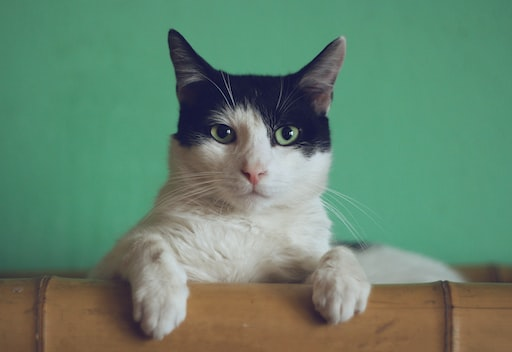

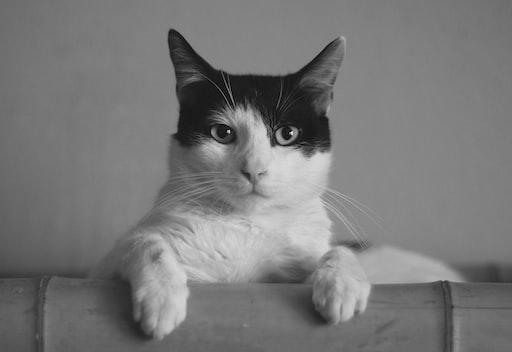

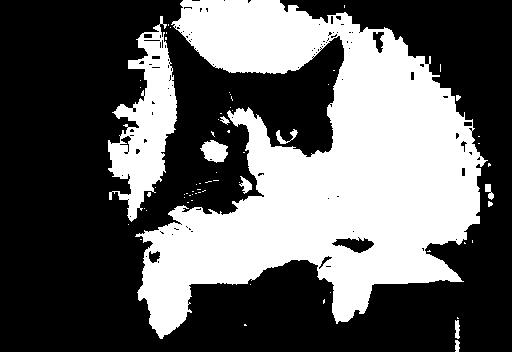

(352, 512)


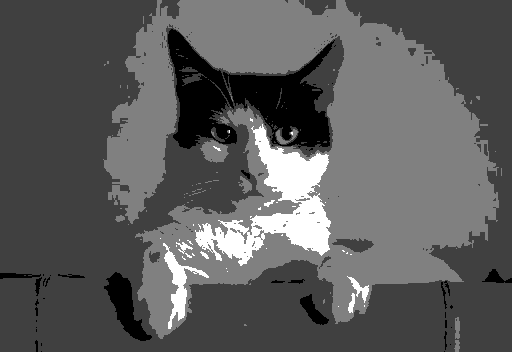

In [102]:
URL = 'https://images.unsplash.com/photo-1514888286974-6c03e2ca1dba?auto=format&fit=crop&q=80&w=512&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D'
colored_image = read_image_from_url(URL)
k = 4 # Number of Bins
cv2_imshow(colored_image)

# TODO: Convert the image to grayscale
grayscale_image = cv2.cvtColor(colored_image, cv2.COLOR_BGR2GRAY)
cv2_imshow(grayscale_image)

# TODO: Convert the grayscale image to binary
threshold_value = 128
max_value = 255
ret, binary_image = cv2.threshold(grayscale_image, threshold_value, max_value, cv2.THRESH_BINARY)
cv2_imshow(binary_image)


img_array = np.array(grayscale_image)
print(img_array.shape)
x = np.arange(256)
div = int(256/k)
list_ther = []
adad = 0
for i in range(k):
  list_ther.append(adad)
  adad+= div
for i in range(img_array.shape[0]):
  for j in range(img_array.shape[1]):
    if(img_array[i,j] >= list_ther[k - 1]):
      img_array[i,j] = 255
    else:
      for p in range(k - 1):
        if(list_ther[p] <= img_array[i,j] < list_ther[p+1]):
          img_array[i,j] = list_ther[p]




cv2_imshow(img_array)










<hr>
<font face="B Mitra" size=5>
<div dir=rtl>

<font size=5>
<b>۲. تغییر اندازه تصاویر در OpenCV</b>
</font>

<br>
<p>
<font size=4>
تغییر اندازه تصاویر یک عملیات اساسی در پردازش تصویر و بینایی کامپیوتری است. این به شما امکان می دهد ابعاد یک تصویر را تغییر دهید و آن را کوچکتر یا بزرگتر کنید.

تابع ()cv2.resize برای تغییر اندازه تصاویر در OpenCV استفاده می شود. سه آرگومان اصلی را می طلبد:(آرگومان‌های دیگری هم داریم که الان به آنها نمی‌پردازیم)
</font>
<ol>
  <li>src: تصویر اصلی که می‌خواهیم آنرا تغییر دهیم.</li>
  <li>‌dsize: اندازه تصویر خروجی که می‌توان آنرا به صورت یک tuple نشان داد. مثلا (width, height)</li>
  <li>fx: ضریب مقیاس در امتداد محور افقی</li>
  <li>fy: ضریب مقیاس در امتداد محور عمودی</li>
</ol>
</p>

</div>
</font>

(600, 800, 3)


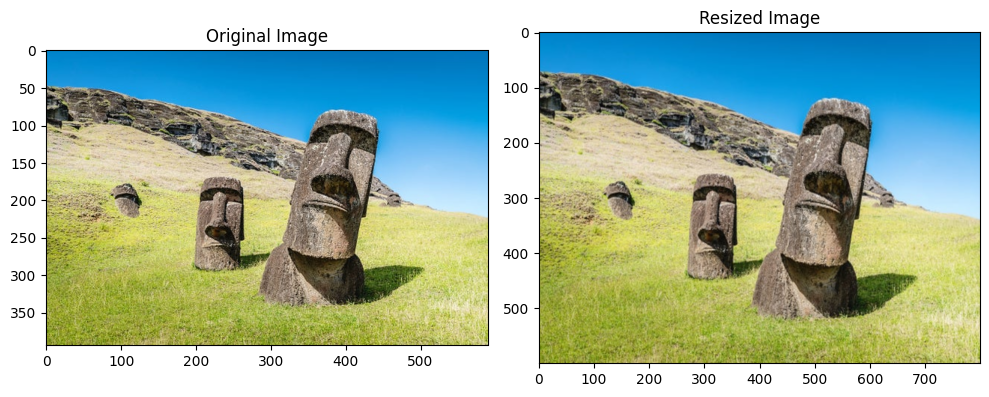

In [98]:
import cv2
import matplotlib.pyplot as plt

# Load an image
image = read_image_from_url("https://static.scientificamerican.com/sciam/cache/file/DB4E849F-5267-4A4C-A8A1F8AB1344C945_source.jpg?w=590&h=800&8397FFEE-1F26-49BC-98ECB53FE3F8A6D6")

# Define the new dimensions (width, height)
new_width = 800
new_height = 600
new_dimensions = (new_width, new_height)


# Resize the image using cv2.resize()
resized_image = cv2.resize(image, new_dimensions)
print(resized_image.shape)

# Display the original and resized images
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

# Resized Image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.title('Resized Image')

plt.tight_layout()
plt.show()


<font face="B Mitra" size=5>
<div dir=rtl>

<font size=5>
<b>تمرین ۲:</b>
</font>

<br>
<p>
<font size=4>
حال که با مفهوم عکس‌های باینری، خاکستری، رنگی و تبدیلات آن ها آشنا شدید لینک یک عکس دلخواه را برداشته: </font>
<ol>
  <li> تصویر مورد نظر را از ابعاد اصلی به ابعاد 640x480 تغییر دهید.</li>
  <li>تصویر اصلی را  به تصویری 50 درصد کوچکتر از ابعاد اصلی تغییر دهید.</li>
  <li> تصویر اصلی را در عین حفظ نسبت تصویر(aspect ratio) به دو برابر ابعاد اصلی تغییر دهید.</li>
</ol>
</p>

<p>می‌توانید از matplotlib یا OpenCV برای نمایش تصاویر استفاده کنید.</p>

</div>
</font>

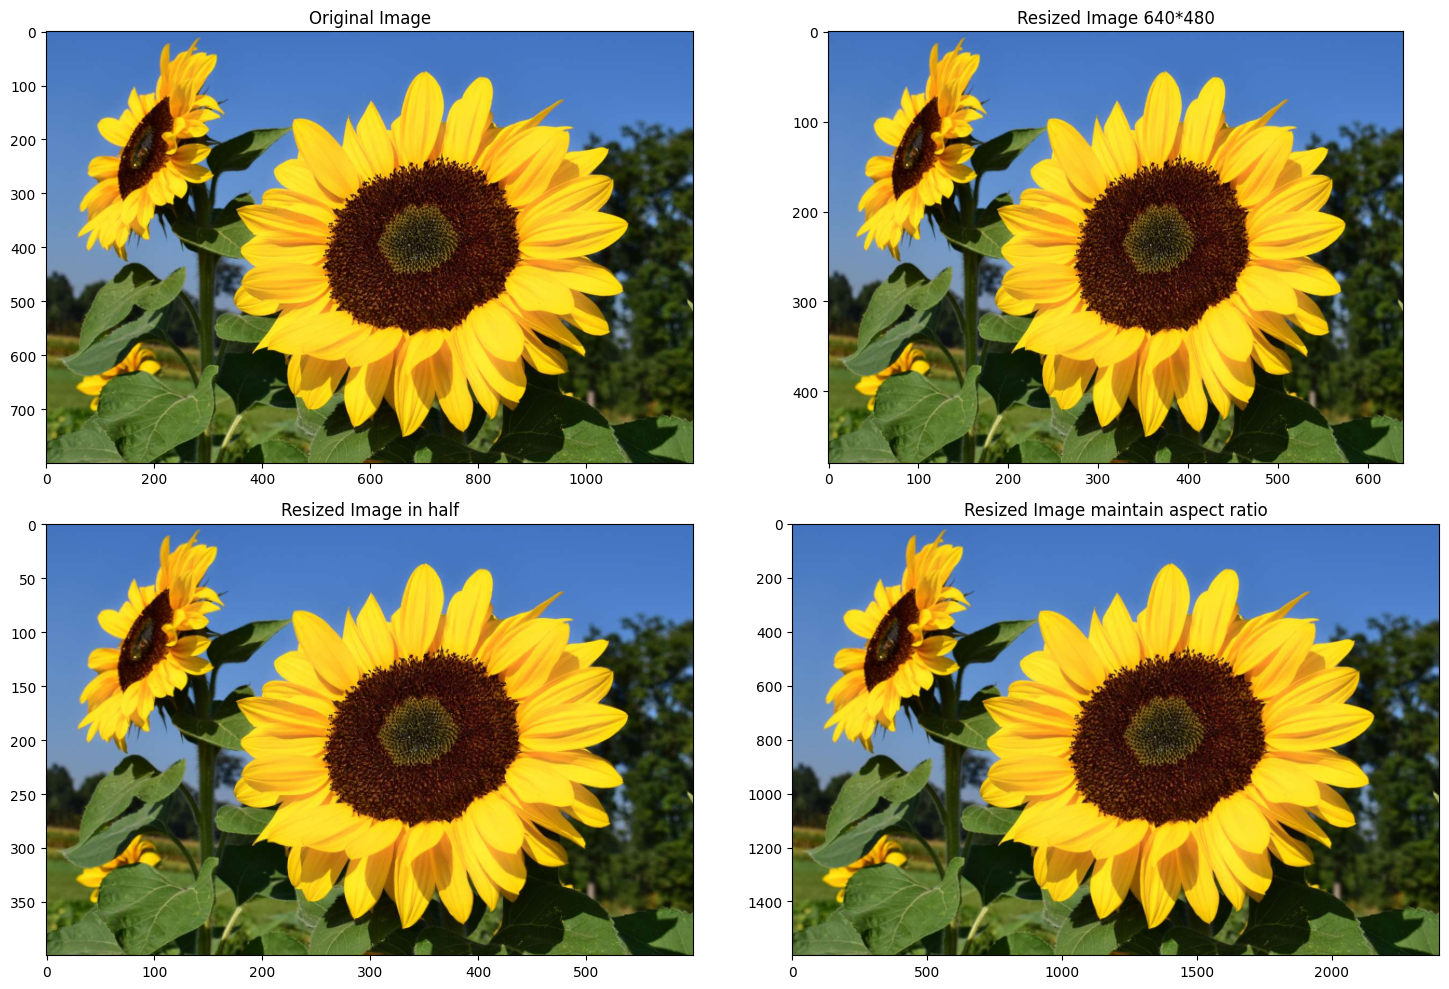

In [99]:
# Your desired image
URL = 'https://s3g2u3k4.rocketcdn.me/wp-content/uploads/sites/4/2022/11/sunflower.jpg'
original_image = read_image_from_url(URL)
#cv2_imshow(original_image)


# TODO: Resize the image to have dimensions 640x480
resized_image1 = cv2.resize(original_image, (640,480))
#cv2_imshow(resized_image1)

# TODO: Resize the image to be 50% of its original size
resized_image2 = cv2.resize(original_image, (0,0), fx=0.5, fy=0.5)
#cv2_imshow(resized_image2)

# TODO: Resize the image to double its original width while maintaining the aspect ratio
width = int(original_image.shape[1] * 2)
height = int(original_image.shape[0] * 2)
dim = (width, height)
resized_image3= cv2.resize(original_image, dim)
#cv2_imshow(resized_image3)

plt.figure(figsize=(15, 10))

# Original Image
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(resized_image1, cv2.COLOR_BGR2RGB))
plt.title('Resized Image 640*480')

plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(resized_image2, cv2.COLOR_BGR2RGB))
plt.title('Resized Image in half')

plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(resized_image3, cv2.COLOR_BGR2RGB))
plt.title('Resized Image maintain aspect ratio')

plt.tight_layout()
plt.show()



<hr>
<font face="B Mitra" size=5>
<div dir=rtl>

<font size=6>
<b>۳. هیستوگرام</b>
</font>

<br>
<p>
<font size=4>
در پردازش تصویر هیستوگرام یک نمایش گرافیکی از توزیع فرکانس مقادیر شدت پیکسلی یک تصویر است. هیستوگرام تعداد پیکسل‌ها برای هر سطح از شدت را نمایش می‌دهد. (مثلا از ۰ تا ۲۵۵ در تصاویر خاکستری ) و معمولا به شکل نمودار میله‌ای نمایش داده‌ می‌شود. هیستوگرام‌ها اطلاعات زیادی در اختیار ما می‌گذارند که می‌تواند برای اموری مثل افزایش کیفیت، تنظیم کنتراست و thresholding استفاده می‌شود.

مفاهیم کلیدی:

<ol>
  <li>
  شدت پیکسل: به معنای روشنایی یا میزان خاکستری بودن یک پیکسل است و در یک تصویر خاکستری عددی بین ۰(سیاه) تا ۲۵۵(سفید) می‌باشد.</li>
  <li> فرکانس سطوح شدت:‌ اندازه یک میله در نمودار هیستوگرام نشان‌دهنده میزان پیکسل‌ها با شدت خاص در یک تصویر می‌باشد.</li>
  <li>کنتراست:‌ پخش میزان شدت در یک تصویر. کنتراست بالاتر به این معناست که تصویر دارای طیف گسترده‌تری از میزان شدت‌ها در تصویر است و کنتراست پایین تر به معنای طیف کوچکتر است.</li>
</ol>
</font>
</p>
<hr/>
</div>
</font>

<font face="B Mitra" size=5>
<div dir=rtl>

<font size=5>
<b>۱. نمایش هیستوگرام تصاویر</b>
</font>

<br>
<p align="justify">
<font size=4>
در این مرحله قصد داریم تصاویر را از URL‌های
مختلف بخوانیم و سپس هیستوگرام آنها را نمایش دهیم.
به عنوان مثال به اینگونه کار انجام می‌شود:


</font>
</p>

</div>
</font>

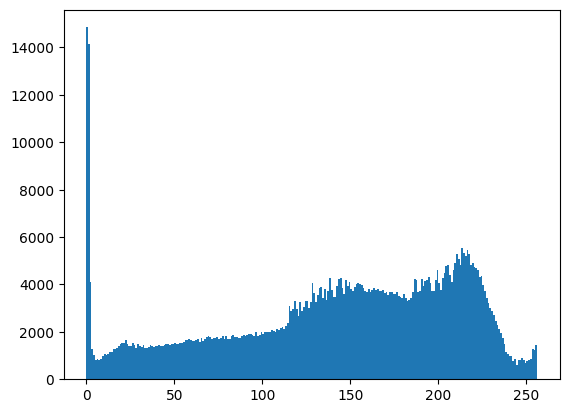

In [100]:
image = read_image_from_url("https://static.scientificamerican.com/sciam/cache/file/DB4E849F-5267-4A4C-A8A1F8AB1344C945_source.jpg?w=590&h=800&8397FFEE-1F26-49BC-98ECB53FE3F8A6D6")
plt.hist(image.ravel(),bins = 256, range = [0,256])
plt.show()

<font face="B Mitra" size=5>
<div dir=rtl>

<font size=5>
<b>تمرین ۳:</b>
</font>

<br>
<p>
<font size=4>
با توجه به تصاویر تبدیل شده در تمرین قبل هیستوگرام هر یک را رسم کرده (تصویر خاکستری و باینری)  و دلیل تفاوت هیستوگرام ها را شرح دهید.</font>
</p>

</div>
</font>

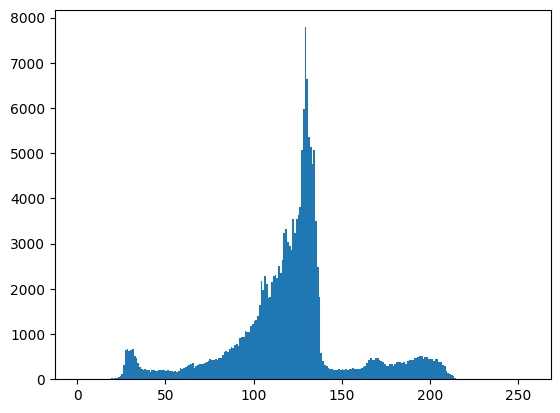

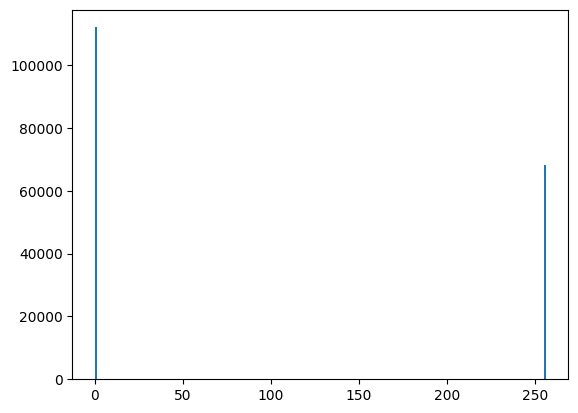

In [101]:
# Your desired image
URL = 'https://images.unsplash.com/photo-1514888286974-6c03e2ca1dba?auto=format&fit=crop&q=80&w=512&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D'
colored_image = read_image_from_url(URL)

# TODO: Calculate and plot the histograms
grayscale_image = cv2.cvtColor(colored_image, cv2.COLOR_BGR2GRAY)
plt.hist(grayscale_image.ravel(),bins = 256, range = [0,256])
plt.show()

threshold_value = 128
max_value = 255
ret, binary_image = cv2.threshold(grayscale_image, threshold_value, max_value, cv2.THRESH_BINARY)
plt.hist(binary_image.ravel(),bins = 256, range = [0,256])
plt.show()


# TODO: Compare the histograms and provide observations
#پایین نمودارهای هیستوگرام


همانطور که گفته شد هیستوگرام تعداد پیکسل‌ها برای هر سطح از شدت را نمایش می‌دهد.
در نمودار هیستوگرام اول شدت از حدود ۱۵ تا ۲۱۰ پخش شده است و در بازه ۱۰۰ تا ۱۴۰ تعداد بیشتری را دارد چون تعداد پیکسل با شدت میانی زیاد است کنتراست تصویر کمتر از حالت باینری است.

در عکس باینری تنها دو شدت ۰و ۲۵۵است که باعث کنتراست بسیار بالای تصویر میشود.

در حالت گری اسکیل شدت‌های بیشتری نسبت به عکس باینری وجود دارد